<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-8-More-on-Functions" data-toc-modified-id="Chapter-8-More-on-Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 8 More on Functions</a></span><ul class="toc-item"><li><span><a href="#8.1-Global-Variables" data-toc-modified-id="8.1-Global-Variables-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>8.1 Global Variables</a></span></li><li><span><a href="#8.2-Default-Parameters" data-toc-modified-id="8.2-Default-Parameters-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>8.2 Default Parameters</a></span></li><li><span><a href="#8.3-Introduction-to-Recursion" data-toc-modified-id="8.3-Introduction-to-Recursion-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>8.3 Introduction to Recursion</a></span></li><li><span><a href="#8.4-Making-Functions-Reusable" data-toc-modified-id="8.4-Making-Functions-Reusable-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>8.4 Making Functions Reusable</a></span></li><li><span><a href="#8.5-Functions-as-Data" data-toc-modified-id="8.5-Functions-as-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>8.5 Functions as Data</a></span></li><li><span><a href="#8.7-Lambda-Expressions" data-toc-modified-id="8.7-Lambda-Expressions-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>8.7 Lambda Expressions</a></span></li><li><span><a href="#8.8-Generators" data-toc-modified-id="8.8-Generators-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>8.8 Generators</a></span></li><li><span><a href="#8.9-Local-Function-Definitions" data-toc-modified-id="8.9-Local-Function-Definitions-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>8.9 Local Function Definitions</a></span></li><li><span><a href="#8.10-Decorators" data-toc-modified-id="8.10-Decorators-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>8.10 Decorators</a></span></li><li><span><a href="#8.11-Exercises" data-toc-modified-id="8.11-Exercises-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>8.11 Exercises</a></span></li></ul></li></ul></div>

## Chapter 8 More on Functions

This chapter introduces recursion and other important things.

### 8.1 Global Variables

Local variables: variables defined within functions
    
* Only uses memory when the function is executed
    
* The same variable name can be used in different functions without any conflict. If the interpreter attempts to execute a statement that uses an undefined variable, you'll get a run-time error.

* Functions that use only local variables can be tested for correctness in isolation from other functions you may have written, since they don't affect the behavior of the other functions.
    
Global variables: variables defined outside functions

* are defined using the global reserved word
    
* if a function defines a local variable with the same name as a global variable, the global variable becomes inaccessible; so the local variable hides the global variable from code in the function's body.

Independent function: the exclusion of global variables

Dependent function: depends on information outside of its scope to perform

### 8.2 Default Parameters

We can define our own functions that accept a varying number of parameters by using a technique known as *default parameters*.

Consider the following example:

In [7]:
def countdown(n=10):
    from time import sleep
    for count in range(n, 0, -1):
        print(count)
        sleep(0.4)
countdown()

10
9
8
7
6
5
4
3
2
1


You can mix non-default and default parameters in the parameters lists of a function declaration, but default parameters must appear after the non-default parameters.

Like so:

In [10]:
def sum_range(n, m=100):

SyntaxError: unexpected EOF while parsing (<ipython-input-10-73d196950e25>, line 1)

### 8.3 Introduction to Recursion

The *factorial* function is widely used in combinatorial analysis (counting theory), probability theory, and statistics. It is usually expressed as $n!$, which for non-negative integers is equal to: 
    
$$n! = n*(n-1)*(n-2)*(n-3)*3*2*1$$

In a similar way, Python functions can also be defined recursively.

In addition, the greatest common divisor can be defined as follows:

$$gcd(a, 0) = a$$

and 

$$gcd(a,b) = gcd(b, a mod b)$$

[GCD](https://en.wikipedia.org/wiki/Greatest_common_divisor#Calculation)

Take a look at the following example:

In [17]:
# Factorial 

def factorial(n):
    if n <= 1: # Don't forget this part or you'll be stuck with a run-time error
        return 1
    else:
        return n*factorial(n-1) # This is where we call the function inside itself

for i in range(0, 10):
    print(f"{i}! = {factorial(i)}")

0! = 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880


In [18]:
# Greatest common divisor

def gcd(a, b):
    if b == 0:
        return a
    else:
        return gcd(a, a%b)

gcd(2, 4)

2

A correct, simple recursive function is based on the following 4 principles:

1. The function, optionally, must call itself within its definition - *recursive case*

2. The function, optionally, must not call itself within its definition - *base case*

3. Some sort of conditional expression (like an **if/else** statement) selects between the recursive case and the base case based on one or more parameters in the function call

4. Each invocation must move the execution closer to the base case, i.e., converge back to the base case.

### 8.4 Making Functions Reusable

If a function does use any programmer-defined global variables or programmer-defined functions, it can be reused in other programs. However, if you do use external dependencies, they must also be included in the new program as well.

* It should be noted that the author of these notebooks copies from the source code all of the time.

For example, if you make a t-test function that you would like to use for other projects, using only what you've learned up to this point, you would have to copy and paste the function and any dependencies as well. God forbid you discover a bug in the function and you've copied it to multiple programs.

Luckily, there is a solution, in the form of *modules*, which is made up of the Python source file.

You can import these modules via the **import** statment, with the optional **from** and **as** parameters.

In [24]:
import numpy as np
from numpy import array

### 8.5 Functions as Data

`buffering`: a special place in memory that helps speed up programs

Buffering can also cause programs to not print the full output.

To fix this problem: add the keyword **flush** with the value **True**.

### 8.7 Lambda Expressions

One of the primary benefits of functions is that we can write a function's code once and use it wherever we want within the program.

Python supports simple, anonymous functions via **lambda** expressions.

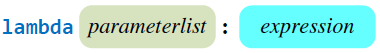

* **lambda** is a reserved word that introduces a lambda expression

* *parameterlist* is a comma-separated list of parameters, just like in a function's definition

* *expression* is a single Python expression, thus, it cannot be a block of statements

* use an implicit **return** statement

* assignments are not possible within **lambda** expressions

* loops are not allowed

* So, what's the point of using lambda expressions then???

### 8.8 Generators

Usually, functions cannot remember anything about past invocations/uses.

In order to write functions with persistence, we need to use programming *objects*.

A `generator` is a programming object that produces/generates a sequence of values. The code that uses the `generator` consumes the generator's product.

Instead of using the **return** keyword, it uses the **yield** keyword. If the body of a **def** contains **yield**, the function automatically becomes a generator function.

A `generator` object is one example of an iterable object, which can be accessed via a **for** statement.

Again, when would I use a generator over a regular function?

### 8.9 Local Function Definitions

Remember, *functional decomposition* is breaking down a large, complex program into smaller, more manageable pieces.

Python allows users to define functions within other functions, which are accessible available to the code *within* their enclosing function but are inaccessible *outside* their enclosing function.

Take for example the calculation of a derivative:

$$f'(a) = \lim_{h \to 0}\frac{f(a+h)-f(a)}{h}$$

The derivative of a function is itself a function, and the closer $h$ gets to 0, the better the derivative estimate becomes.

Let's try to find the derivative of $3x^{2}+5$ at various points.

In [31]:
def derivative(f, h):
    """Approximates the derivative of a function f
    given an h value. The close h is to zero, the 
    better the estimate.  """
    return lambda x: (f(x+h)-f(x)) / h

def fun(x):
    return (3*x**2) + 5 # Our sample function to differentiate

def ans(x):
    return 6*x # The known derivative to function

# Difference: Closer to 0 = better
h = 0.0000001

# Compute the function representing an approximation of the derivative
der = derivative(fun, h)

# Compare the computed derivative to the exact derivative derived symbollically
x = 5.0
print('------------------------------------------------------')
print('                            Approx.     Actual')
print(' x          f(x)      h      f\'(x)      f\'(x)')
print('------------------------------------------------------')
while x < 5.1:
    print('{:.5f} {:.5f} {:.8f} {:.5f} {:.5f}'.format(x, fun(x), h, der(x), ans(x)))
    x += 0.01

------------------------------------------------------
                            Approx.     Actual
 x          f(x)      h      f'(x)      f'(x)
------------------------------------------------------
5.00000 80.00000 0.00000010 30.00000 30.00000
5.01000 80.30030 0.00000010 30.06000 30.06000
5.02000 80.60120 0.00000010 30.12000 30.12000
5.03000 80.90270 0.00000010 30.18000 30.18000
5.04000 81.20480 0.00000010 30.24000 30.24000
5.05000 81.50750 0.00000010 30.30000 30.30000
5.06000 81.81080 0.00000010 30.36000 30.36000
5.07000 82.11470 0.00000010 30.42000 30.42000
5.08000 82.41920 0.00000010 30.48000 30.48000
5.09000 82.72430 0.00000010 30.54000 30.54000
5.10000 83.03000 0.00000010 30.60000 30.60000


### 8.10 Decorators

We can add functionality to arbitrary functions

However, it can be laborious to modify a function every time we want to use it, especially if we have tons of functions that we'd like to use.

What we want is a way to augment the functions in a uniform way without modifying them. Luckily, since functions can be used as arguments and are objects, we can.

In essence, a `decorator` does not change the way a function works, but rather, it simply adds some "decoration" to the function which usually augments the functions behavior in some way. Also, `a decorator` is a callable that returns a callable. 

It cannot modify the inner workings of a function.

Uses the special **@** syntax.

You also get to unlock a new color when coding!

### 8.11 Exercises